<a href="https://colab.research.google.com/github/MarioHenriqueUFAL/Data_science/blob/main/softsensor_RNA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDIÇÃO DE VARIÁVEIS DE UM PROCESSO QUÍMICO USANDO SENSOR VIRTUAL DE RNA

## Treinamento do Modelo de RNA

<font size="4">Este código é um script em Python que utiliza a biblioteca TensorFlow para criar, treinar e avaliar uma Rede Neural Artificial (RNA) para predição de uma variável de processo em um conjunto de validação. Ao final é gerado um gráfico de dispersão para visualizar o quão bom o modelo é na predição da variável de interesse.</font>

<font size="4">Primeiramente, foram importadas todas as bibliotecas que serão utilizadas nesta etapa.</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

<font size="4">São utilizados duas bases de dados para o treinamento do modelo: a primeira contém 4.356.987 de operação dinâmica do processo, onde foram medidas variáveis como temperatura, concentração, vazão e taxa de troca térmica; a segunda representa um segundo conjunto de dados independetes do primeiro, gerados em uma segunda simulação dinâmica do processo. O uso de duas bases de dados diferentes se justifica pela necessidade de evitar o *overfitting*, ou seja, para garantir que o modelo consiga generalizar bem para conjuntos de dados não vistos na etapa de treinamento.</font>

<font size="4">Após carregados, os dados foram separados em atributos previsores (X_train) e atributo objetivo (y_train), indicando para o modelo quais são as variáveis que serão utilizadas como entrada do modelo (atributos previsores) para realizar a predição da variável objetivo (y_train)</font>

In [ ]:
# 1. Carregar os dados de treinamento
dados = pd.read_csv("Simulacoes_9s_tratada_3_atraso.csv")
X_train = dados[['CB(k-3)','CB(k-2)','CB(k-1)','Tr(k-3)','Tr(k-2)',
                 'Tr(k-1)','Tc(k-3)','Tc(k-2)','Tc(k-1)','Tr0(k-3)',
                 'Tr0(k-2)','Tr0(k-1)','CA0(k-3)','CA0(k-2)','CA0(k-1)',
                 'Qc(k-3)','Qc(k-2)','Qc(k-1)','qr(k-3)','qr(k-2)','qr(k-1)']]
y_train = dados['CB(K)']

In [ ]:
# 2. Carregar os dados de validação
dados_validacao = pd.read_csv("Simulacoes_9s_acuracia_tratada_3_atraso.csv")
X_validacao = dados_validacao[['CB(k-3)','CB(k-2)','CB(k-1)','Tr(k-3)','Tr(k-2)',
                               'Tr(k-1)','Tc(k-3)','Tc(k-2)','Tc(k-1)','Tr0(k-3)',
                               'Tr0(k-2)','Tr0(k-1)','CA0(k-3)','CA0(k-2)','CA0(k-1)',
                               'Qc(k-3)','Qc(k-2)','Qc(k-1)','qr(k-3)','qr(k-2)','qr(k-1)']]
y_validacao = dados_validacao['CB(K)']

<font size="4">Os dados de entrada foram normalizados aplicando a função "MinMaxScaler()" da biblioteca scikit-learn, transformando os dados para o intervalo [0,1]. A normalização dos dados é uma etapa fundamental, pois os dados de entrada possuem diferentes escalas. Para garantir que a diferença de escalas entre as variáveis não afetem o dsempenho do modelo, são utilizadas as técnicas de normalização que transformam os dados para a mesma escala de valores.

<font size="4"></font></font>

In [ ]:
# 3. Normalizar os dados
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validacao_scaled = scaler.transform(X_validacao)

<font size="4">A arquitetura da RNA foi definida utilizando a classe 'Sequential' da biblioteca TensorFlow. A RNA possui três camadas: camada de entrada, com 16 neurônios; camada oculta, com 8 neurônios; e camada de saída, com 1 neurônios. A camada de entrada e camada oculta utilizaram a função de ativação 'ReLu', enquanto na última foi empregada a função de ativação linear.</font>

In [ ]:
# 4. Criar o modelo de rede neural
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

<font size="4">O modelo foi compilado utilizando o otimizador 'adam' e a função de perda 'mse' (mean squared error).</font>

In [ ]:
model.compile(optimizer='adam', loss='mse')

<font size="4">O treinamento foi realizado usando o método 'fit' e um critério de parada antecipada (EarlyStopping), empregado para evitar o overfitting do modelo. Também é fornecido o conjunto de validação, utilizado no monitoramento do desempenho do modelo e da perda durante o treinamento.</font>

In [ ]:
# 5. Treinar o modelo com os dados de treinamento e validação
early_stop = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_validacao_scaled, y_validacao), callbacks=[early_stop])

<font size="4">O modelo treinado foi salvo em um arquivo no formato ".h5" para ser utilizado na etapa de "simulação dinâmica do processo com soft sensor".</font>

In [ ]:
# 6. Salvar o modelo treinado
model.save('modelo_treinado_9s_3_atraso.h5')

<font size="4">Para avaliar o desempenho do modelo no conjunto de validação, foram calculadas as métricas MSE, R² e MAE, comparando os valores preditos pelo modelo e os valores reais.</font>

In [ ]:
# 8. Avaliar o desempenho do modelo no conjunto de validação
y_pred_validacao = model.predict(X_validacao_scaled)
mse_validacao = mean_squared_error(y_validacao, y_pred_validacao)
r2_validacao = r2_score(y_validacao, y_pred_validacao)
mae_validacao = mean_absolute_error(y_validacao, y_pred_validacao)

print(f'MSE (validação): {mse_validacao}')
print(f'R2 (validação): {r2_validacao}')
print(f'MAE (validação): {mae_validacao}')

12382/12382 [==============================] - 9s 735us/step
MSE (validação): 5.825976150166476e-08
R2 (validação): 0.9999684516932812
MAE (validação): 0.00014317343792673054


<font size="4">A partir das métricas de desempenho, podemos concluir que o modelo apresentou ótimo desempenho. Com mais de 99,99% da variabilidade dos dados sendo explicada pelas variáveis de entrada. Além disso, o modelo conseguiu realizar predições com erro absoluto médio de 0,00014, o que mostra a ótima capacidade da RNA em predizer os valores temporais da variável objetivo (CB).</font>

<font size="4">O gráfico de dispersão foi gerado para verificação visual do desempenho do modelo.</font>

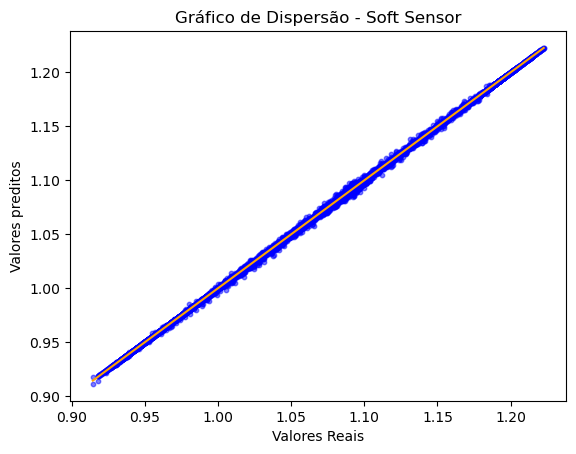

In [ ]:
# 10. Gerar gráfico de dispersão
plt.scatter(y_validacao, y_pred_validacao, s=10, c='blue', alpha=0.5)
plt.plot([y_validacao.min(), y_validacao.max()], [y_validacao.min(), y_validacao.max()], 'orange')
plt.xlabel('Valores Reais')
plt.ylabel('Valores preditos')
plt.title('Gráfico de Dispersão - Soft Sensor')
plt.show()

<font size="4">No gráfico de dispersão, é possível observar que os dados ficaram ajustados à diagonal principal, o que indica que o modelo construído apresenta boa capacidade de generalização para novos conjuntos de dados do processo. Além disso, podemos observar que o modelo consegue estimar bem em toda a faixa de valores de CB.</font>

## Simulação Dinâmica do Processo com o uso do Soft Sensor de RNA

<font size="4">A simulação dinâmica foi realizada para a construção do perfil temporal da variável CB. Através do perfil temporal são comparados os valores preditos pelo modelo de soft sensor e os valores reais do processo.</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

<font size="4">O modelo treinado na etapa anterior foi devidamente carregado para ser utilizado na predição de CB em um conjunto de dados novos.</font>

In [ ]:
# Carregando o modelo treinado
model = load_model("modelo_treinado_9s_3_atraso.h5")

<font size="4">Os dados utilizados no treinamento do modelo foram carregados para realizar o treinamento do "MinMaxScaler", ajustando-o o algoritmo responsável pela normalização das entradas aos dados utilizados no treinamento. Essa etapa é necessária para que a normalização dos dados novos seja feita de forma similar a realizada no conjunto de dados de treinamento.</font>

In [ ]:
# Carregando os dados de treinamento
dados_treinamento = pd.read_csv("Simulacoes_9s_tratada_3_atraso.csv")

<font size="4">Em seguida, o conjunto de dados utilizados para a validação do soft sensor foram importados e serão utilizados no teste da predição dinâmica da variável CB durante a simulação computacional do processo químico.</font>

In [ ]:
# Carregando os dados de validação
dados_validacao = pd.read_csv("Simulacoes_9s_acuracia_tratada_3_atraso.csv", nrows=9000)

Em seguida, os dados foram separados em atributos previsores (variáveis de entrada) e atributo objetivo (variável cujo valor deve ser predito pelo modelo)

<font size="4">Em seguida, os dados foram separados em atributos previsores (variáveis de entrada) e atributo objetivo (variável cujo valor deve ser predito pelo modelo)</font>

In [ ]:
# Preparando os dados para a predição
X = dados_validacao[['CB(k-3)', 'CB(k-2)', 'CB(k-1)', 'Tr(k-3)', 'Tr(k-2)',
                     'Tr(k-1)', 'Tc(k-3)', 'Tc(k-2)', 'Tc(k-1)', 'Tr0(k-3)',
                     'Tr0(k-2)', 'Tr0(k-1)', 'CA0(k-3)', 'CA0(k-2)', 'CA0(k-1)',
                     'Qc(k-3)', 'Qc(k-2)', 'Qc(k-1)', 'qr(k-3)', 'qr(k-2)', 'qr(k-1)']]

# Preparando os dados de treinamento
X_train = dados_treinamento[['CB(k-3)', 'CB(k-2)', 'CB(k-1)', 'Tr(k-3)', 'Tr(k-2)',
                             'Tr(k-1)', 'Tc(k-3)', 'Tc(k-2)', 'Tc(k-1)', 'Tr0(k-3)',
                             'Tr0(k-2)', 'Tr0(k-1)', 'CA0(k-3)', 'CA0(k-2)', 'CA0(k-1)',
                             'Qc(k-3)', 'Qc(k-2)', 'Qc(k-1)', 'qr(k-3)', 'qr(k-2)', 'qr(k-1)']]

<font size="4">Após a separação dos dados, as entradas foram normalizadas utilizando a função "MinMaxScaler", devidamente ajustada com os dados de treinamento.</font>

In [ ]:
# Ajustando e normalizando os dados de entrada com o MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X)

<font size="4">Com as entradas normalizadas, os valores foram preditos utilizando o modelo treinado.</font>

In [ ]:
# Realizando a predição
y_pred = model.predict(X_scaled)
y_true = dados_validacao["CB(K)"]

282/282 [==============================] - 0s 692us/step


In [ ]:
# Criando a coluna "t(s)"
dados_validacao["t(s)"] = np.arange(27, 27 + 9 * len(dados_validacao), 9)

<font size="4">Após a predição dos valores, foi oconstruído um gráfico com os dados temporais do processo, comparando os valores reais de CB e os valores preditos pelo algoritmo de soft sensor.</font>

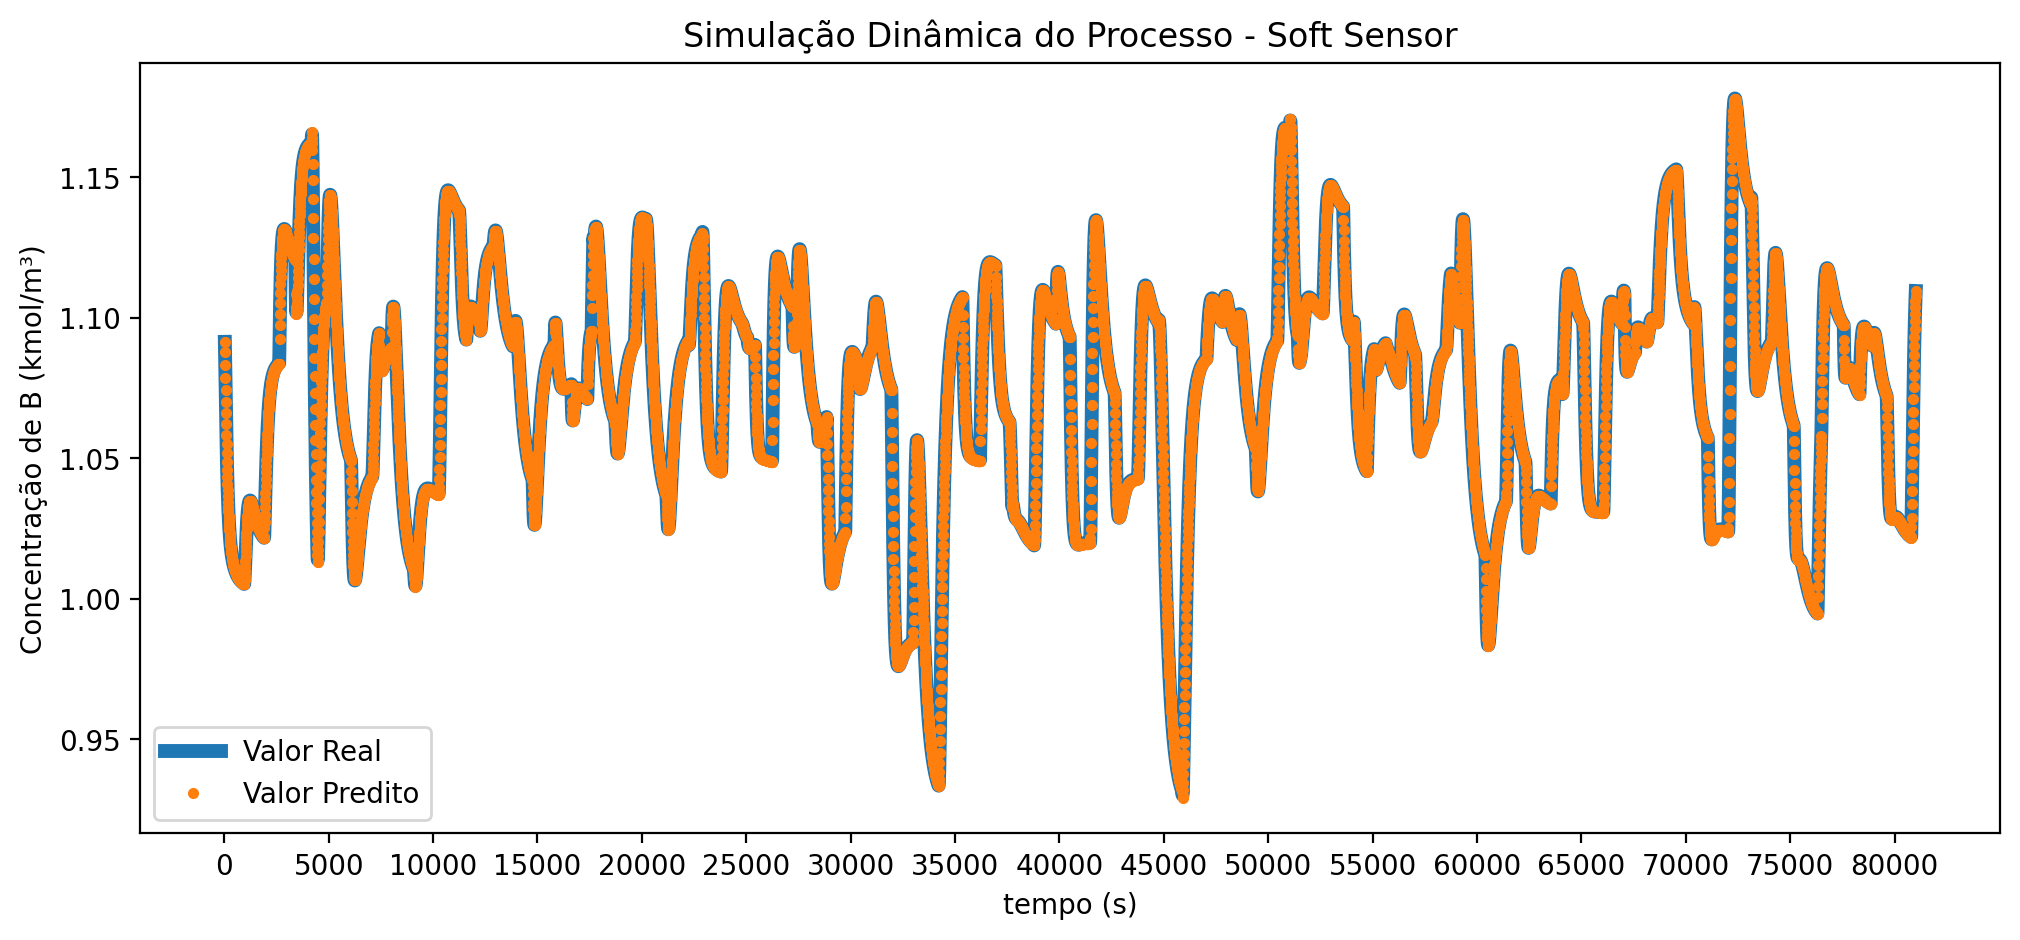

In [ ]:
# Plotando o gráfico
plt.figure(figsize=(12, 5), dpi=200)
plt.plot(dados_validacao["t(s)"], y_true, linewidth=5, label="Valor Real")
plt.plot(dados_validacao["t(s)"], y_pred, linestyle='none', marker='o', markersize=3, label="Valor Predito")
plt.xlabel("tempo (s)")
plt.ylabel("Concentração de B (kmol/m³)")
plt.xticks(np.arange(0, max(dados_validacao["t(s)"]) + 1, 5000))
plt.title('Simulação Dinâmica do Processo - Soft Sensor')
plt.legend()
plt.savefig("grafico_soft_real.png", dpi=300)
plt.show()

In [ ]:
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print(f'MSE (validação): {mse}')
print(f'R2 (validação): {r2}')
print(f'MAE (validação): {mae}')

MSE (validação): 5.1957644214813644e-08
R2 (validação): 0.9999711018769729
MAE (validação): 0.00014743042899396792


<font size="4">A partir da figura acima, podemos concluir que o modelo apresenta excelente desempenho na predição da variável do processo, uma vez que as séries temporais de valores reais e preditos estão perfeitamente sobrepostas. Além disso, o ótimo desempenho na simulação é também comprovado pelas métricas de desempenho obtidas, com coeficiente de determinação (R²) com valor superior a 0,9999 e erro médio absoluto (MAE) de aproximadamente 0,00014.</font>